# VLC Simulation figures

### Imports

In [1]:
from src.figures import *
from src.rays_math import *
from src.utils import *
from src.simulator import *

***
## Random Vectors generations

The first step is to generate rays that point in random directions. These rays must be generated within a hemisphere.

#### Uniform Angular Distribution
With this distribution, there are more rays at the top of the hemisphere 

In [2]:
n = 10000

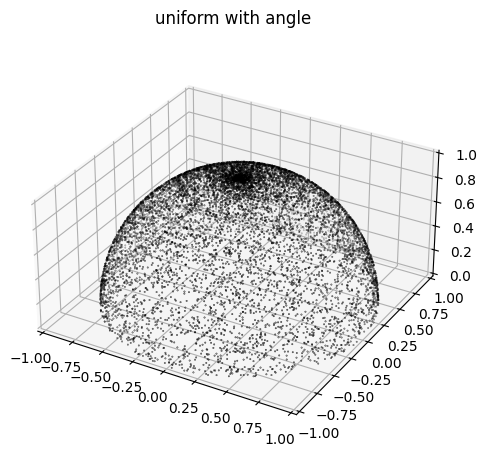

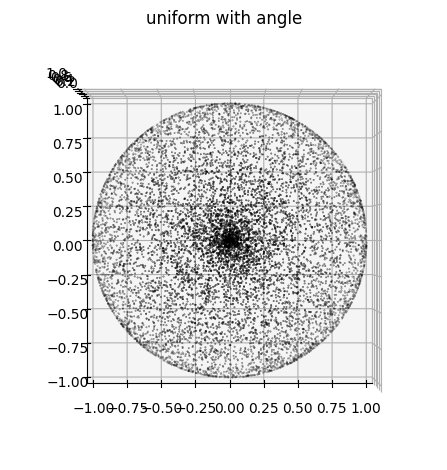

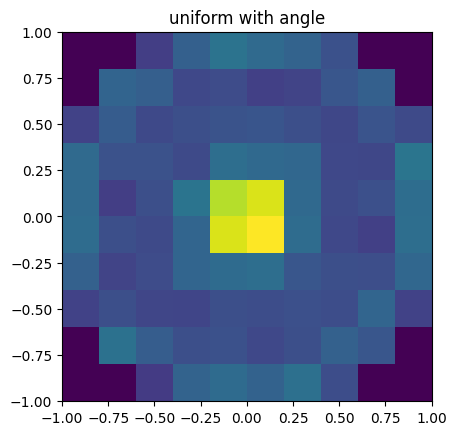

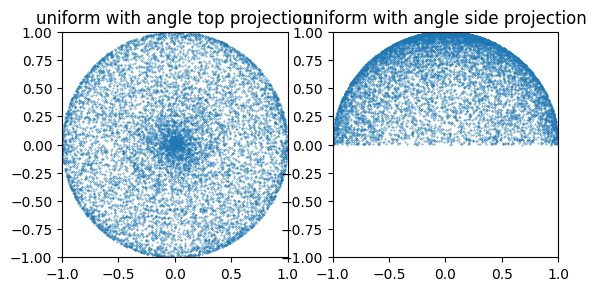

In [3]:
plot_random_vectors(1, n)

#### Uniform Distribution Inside a Cube

With this distribution, there are more points at the corners of the cube.

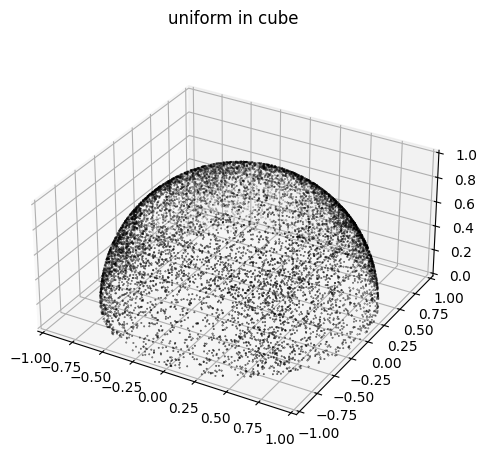

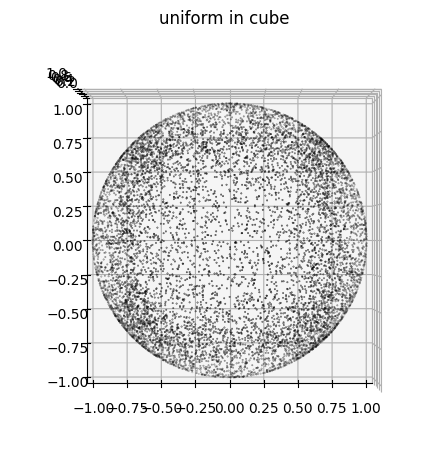

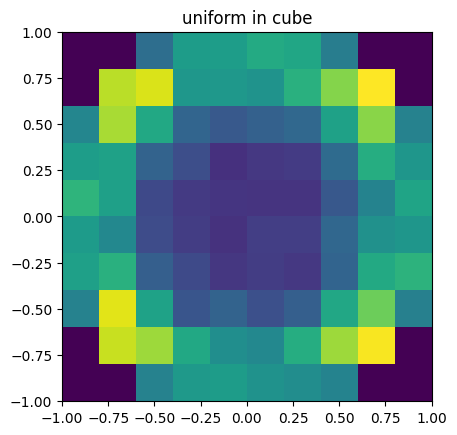

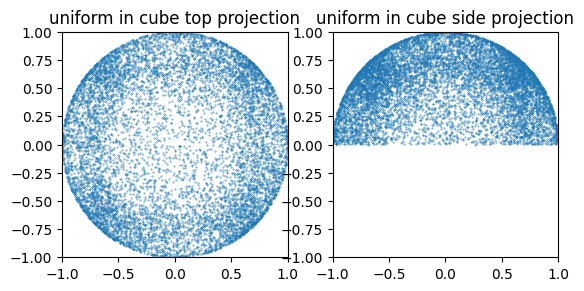

In [4]:
plot_random_vectors(2, n)

#### Normal Distribution

Using a normal distribution, points are equally distributed over the hemisphere.

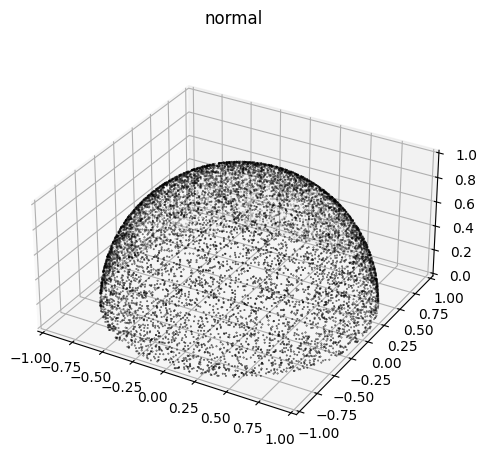

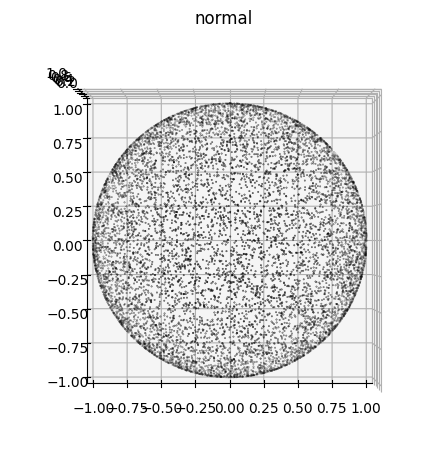

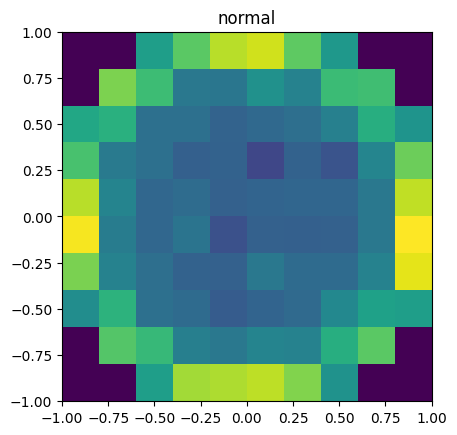

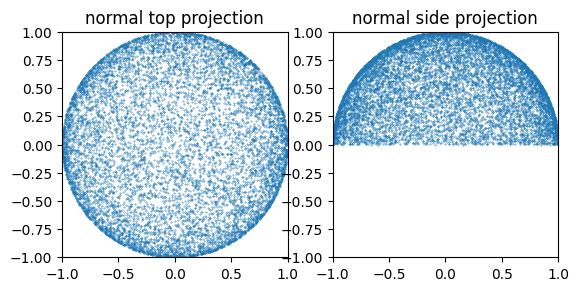

In [5]:
plot_random_vectors(3, n)

***
## Ray Alignment

Once the rays are generated, they must be aligned with the direction of an emitter.

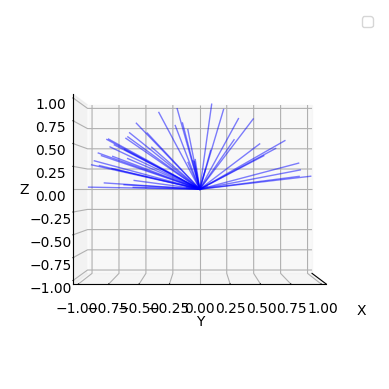

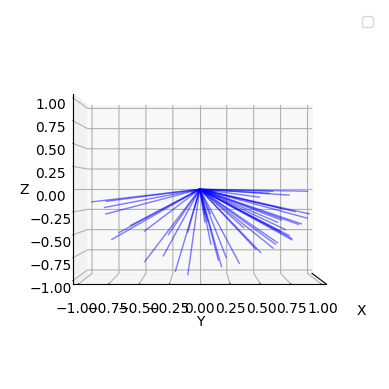

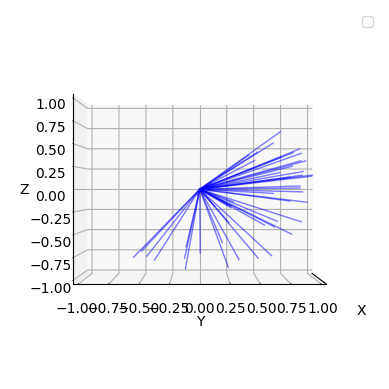

In [6]:
rays = generate_points_normal(50)

z_axis = np.array([0, 0, 1])
bottom_vec = np.array([0, 0, -1])
diag_vec = np.array([0, 1, -1])

bottom_align = align_rays(rays, z_axis, bottom_vec)
diag_align = align_rays(rays, z_axis, diag_vec)

plot_rays(rays, (0, 0, 0))
plot_rays(bottom_align, (0, 0, 0))
plot_rays(diag_align, (0, 0, 0))

***
## Collision of a Ray with a Triangle

Now we need to check for collisions between the rays and triangles. We want to find the closest triangle with which each ray collides and obtain the normal of this triangle for reflection later.

Closest triangle indices: [0 2]
Closest distances: [1.         0.55901699]


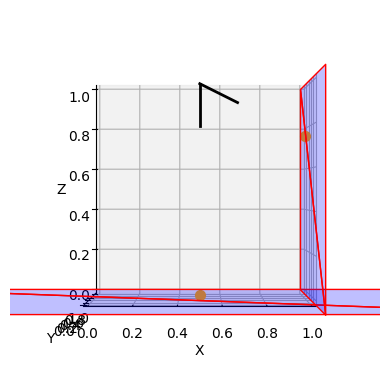

In [7]:
# Data
ray_origins = np.array([[0.5, 0.5, 1], [0.5, 0.5, 1]])
ray_directions = np.array([[0, 0, -1], [1, 0, -0.5]])
ray_directions = normalize_batch(ray_directions)

triangles = np.array([
    [[2, -1, 0], [-1, 1, 0], [2, 1, 0]],
    [[2, -1, 0], [-1, 1, 0], [-1, -1, 0]],
    [[1, -1, 0], [1, 1, 0], [1, 1, 1]],
    [[1, -1, 0], [1, -1, 1], [1, 1, 1]],
])

closest_tri_indices, closest_distances = find_first_collision(ray_origins, ray_directions, triangles)

print("Closest triangle indices:", closest_tri_indices)
print("Closest distances:", closest_distances)

plot_triangles_rays(ray_origins, ray_directions, triangles, closest_distances)

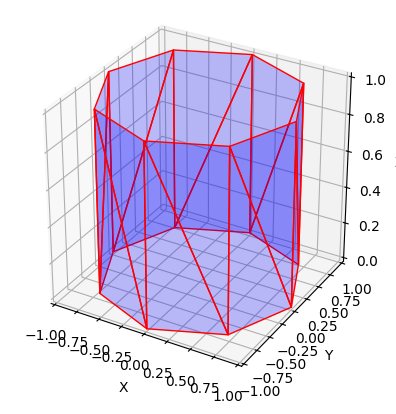

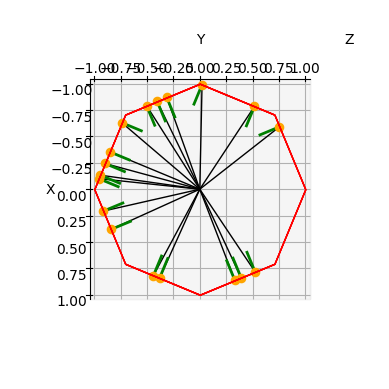

In [8]:
ray_directions = generate_points_normal(20)
ray_directions = align_rays(ray_directions, np.array([0, 0, 1]), np.array([0, 0, -1]))

ray_origins = np.array([[0,0,1]]*20)

triangles = load_triangles_from_file("octo_room")
vertices, normals, _ = get_triangles_values(triangles)

closest_tri_indices, closest_distances = find_first_collision(ray_origins, ray_directions, vertices)

plot_triangles(triangles)
plot_collisions(ray_origins, ray_directions, triangles, closest_tri_indices, closest_distances)

***
## Simulation with Only LOS Rays

#### One Lamp at the Center of a Square Room

0.06068029680058077 0.48784885122809957


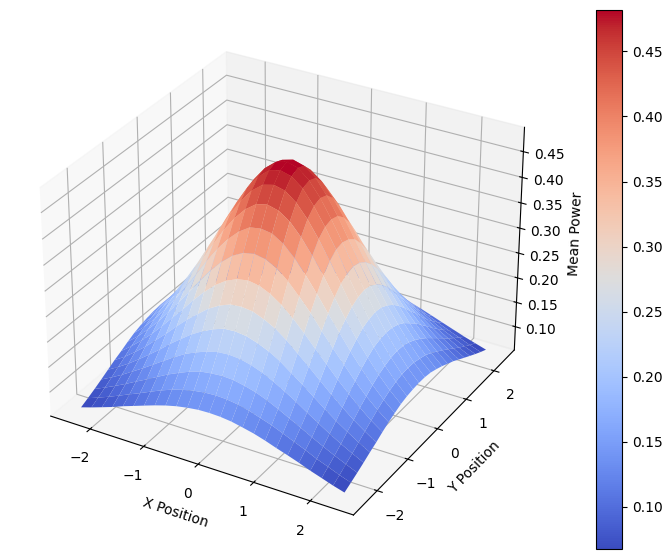

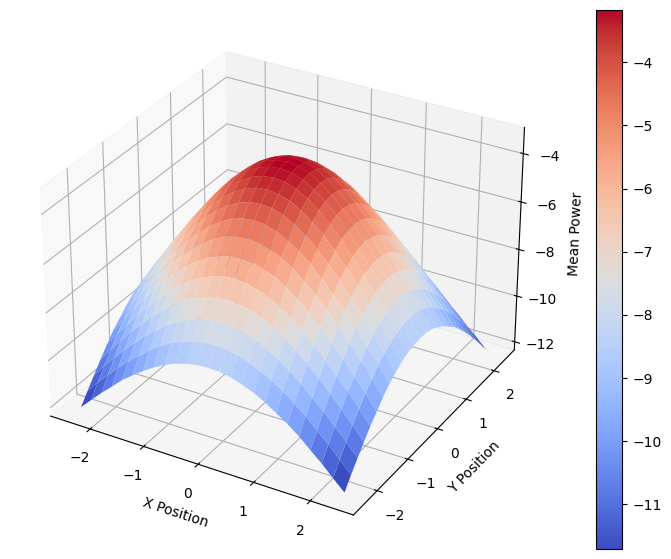

In [9]:
# Emitter
h = 2.5
theta = 60
power = 200

# Receiver
angle = 60
area = 0.016
index = 1.5

emitter = Emitter(np.array([0, 0, h]), np.array([0, 0, -1]), power, theta)
receiver = Receiver(0.000001, angle, area, index, (-2.5, 2.5, -2.5, 2.5))
    
triangles = load_triangles_from_file("square_room")

simulation = VLCSimulator([emitter], receiver, triangles)

X, Y, mean_power, _ = simulation.do_simulation(100000, 10, 0, 25)
print(np.min(mean_power), np.max(mean_power))
plot_surface(X, Y, mean_power)
plot_surface(X, Y, 10 * np.log10(mean_power))

#### Four Lamps in a Square Room

4.163071150196521e-05 0.050463304584578796


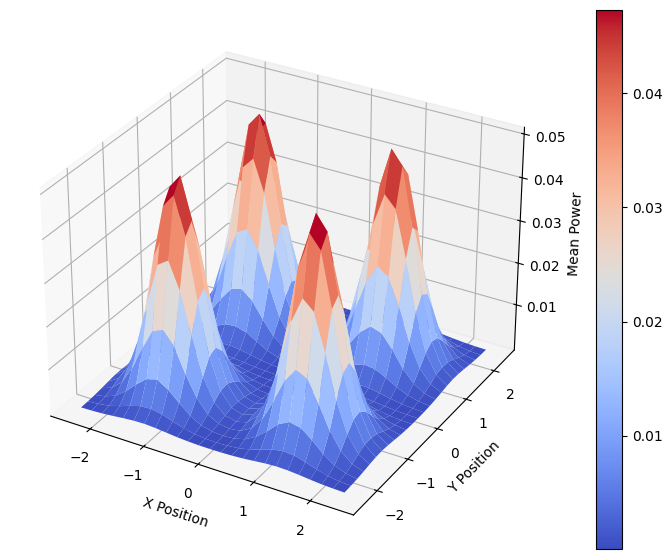

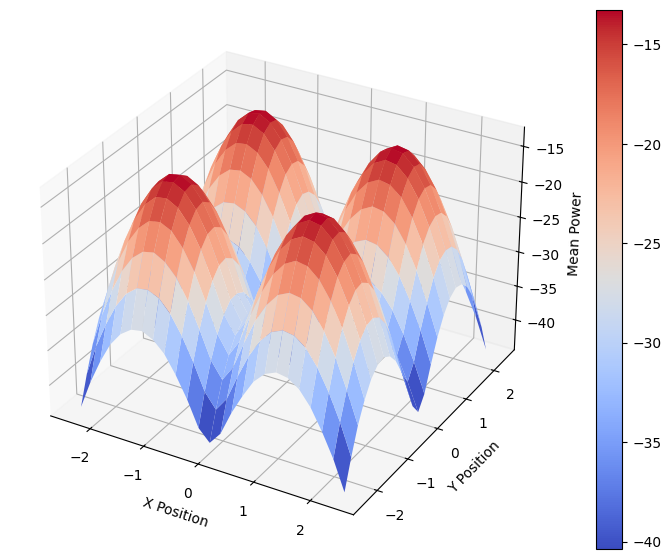

In [10]:
# Emitter
h = 2.15
theta = 12.5
power = 200

# Receiver
angle = 70
area = 1e-4
index = 1.5

emitter1 = Emitter(np.array([-1.25, -1.25, h]), np.array([0, 0, -1]), power, theta)
emitter2 = Emitter(np.array([-1.25, 1.25, h]), np.array([0, 0, -1]), power, theta)
emitter3 = Emitter(np.array([1.25, -1.25, h]), np.array([0, 0, -1]), power, theta)
emitter4 = Emitter(np.array([1.25, 1.25, h]), np.array([0, 0, -1]), power, theta)

receiver = Receiver(0.00001, angle, area, index, (-2.5, 2.5, -2.5, 2.5))
    
triangles = load_triangles_from_file("square_room")

simulation = VLCSimulator([emitter1, emitter2, emitter3, emitter4], receiver, triangles)

X, Y, mean_power, _ = simulation.do_simulation(100000, 10, 0, 25)
print(np.min(mean_power), np.max(mean_power))
plot_surface(X, Y, mean_power)
plot_surface(X, Y, 10 * np.log10(mean_power))

#### One Lamp Centered with a Different Normal

0.0015824453472792915 0.31449862154020625


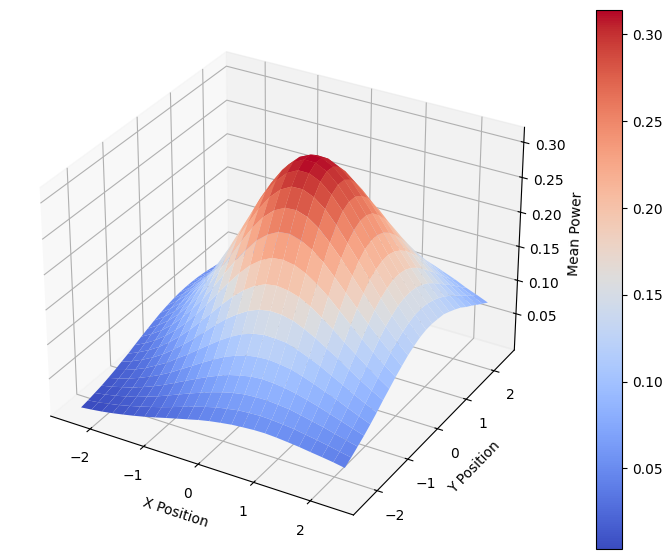

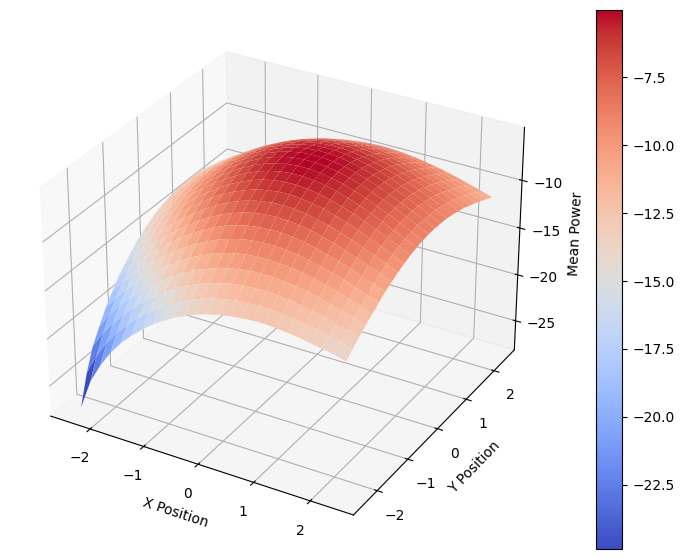

In [11]:
# Emitter
h = 2.5
theta = 60
power = 200

# Receiver
angle = 90
area = 0.016
index = 1.5

emitter_direction = np.array([0.5, 0.5, -1])
emitter_direction = normalize(emitter_direction)

emitter = Emitter(np.array([0, 0, h]), emitter_direction, power, theta)
receiver = Receiver(0.000001, angle, area, index, (-2.5, 2.5, -2.5, 2.5))

triangles = load_triangles_from_file("square_room")

simulation = VLCSimulator([emitter], receiver, triangles)

X, Y, mean_power, _ = simulation.do_simulation(100000, 10, 0, 25)
print(np.min(mean_power), np.max(mean_power))
plot_surface(X, Y, mean_power)
plot_surface(X, Y, 10 * np.log10(mean_power+0.0001))

#### One Lamp in a Room with an Octagonal Shape

0.0 3.0544684823782715


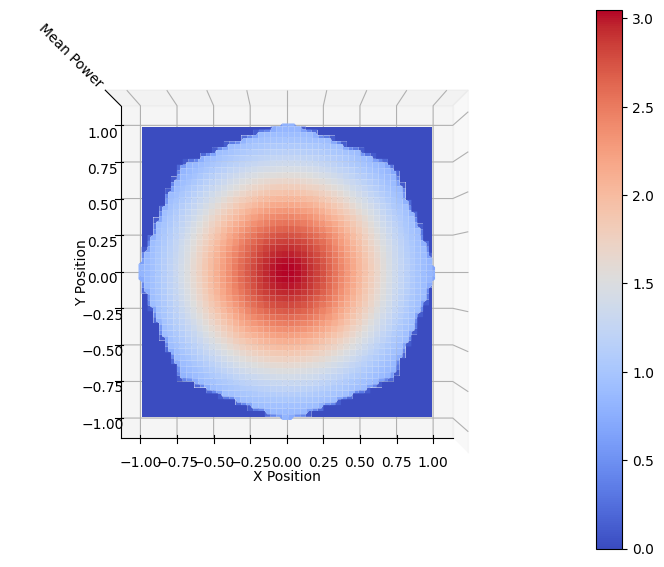

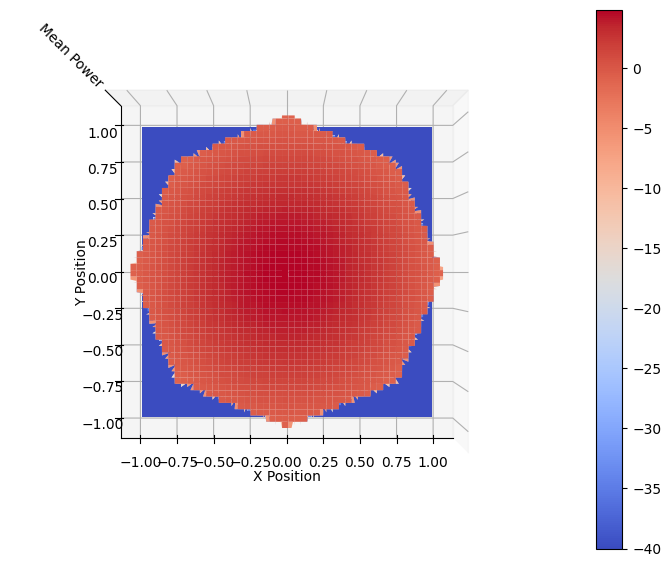

In [13]:
# Emitter
h = 1
theta = 60
power = 200

# Receiver
angle = 60
area = 0.016
index = 1.5

emitter_direction = np.array([0, 0, -1])
emitter_direction = normalize(emitter_direction)

emitter = Emitter(np.array([0, 0, h]), emitter_direction, power, theta)
receiver = Receiver(0.000001, angle, area, index, (-1, 1, -1, 1))

triangles = load_triangles_from_file("octo_room")

simulation = VLCSimulator([emitter], receiver, triangles)

X, Y, mean_power, _ = simulation.do_simulation(100000, 10, 0, 100)
print(np.min(mean_power), np.max(mean_power))
plot_surface(X, Y, mean_power, view=(90, -90, 0))
plot_surface(X, Y, 10 * np.log10(mean_power+0.0001), view=(90, -90, 0))

#### One Lamp in a Corner Room

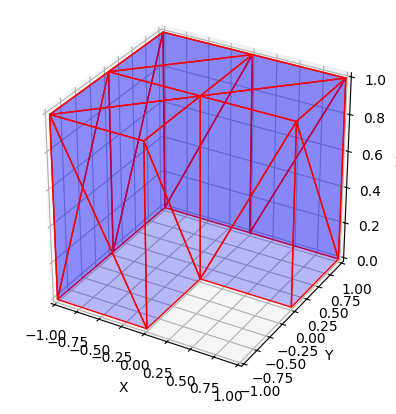

In [14]:
triangles = load_triangles_from_file("corner_room")
plot_triangles(triangles)

0.0 2.8275638200902975


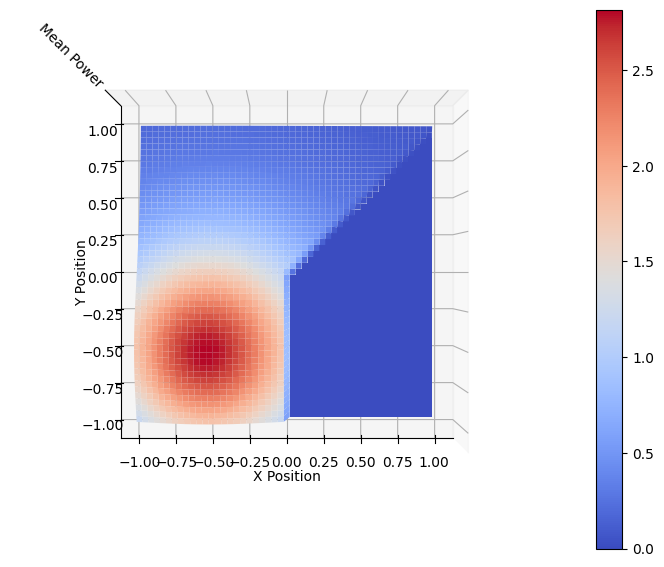

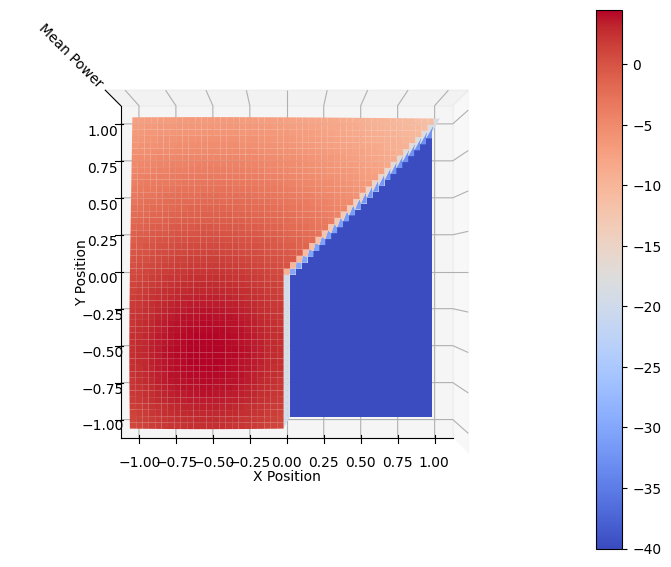

In [15]:
# Emitter
h = 0.9
theta = 60
power = 200

# Receiver
angle = 90
area = 0.016
index = 1.5

emitter_direction = np.array([0, 0, -1])
emitter_direction = normalize(emitter_direction)

emitter = Emitter(np.array([-0.5, -0.5, h]), emitter_direction, power, theta)
receiver = Receiver(0, angle, area, index, (-1, 1, -1, 1))
triangles = load_triangles_from_file("corner_room")

simulation = VLCSimulator([emitter], receiver, triangles)

X, Y, mean_power, _ = simulation.do_simulation(100000, 10, 0, 50)
print(np.min(mean_power), np.max(mean_power))
plot_surface(X, Y, mean_power, view=(90, -90, 0))
plot_surface(X, Y, 10 * np.log10(mean_power+0.0001), view=(90, -90, 0))

***
## Simulation with Reflected Rays

#### One Lamp at the Center of a Square Room

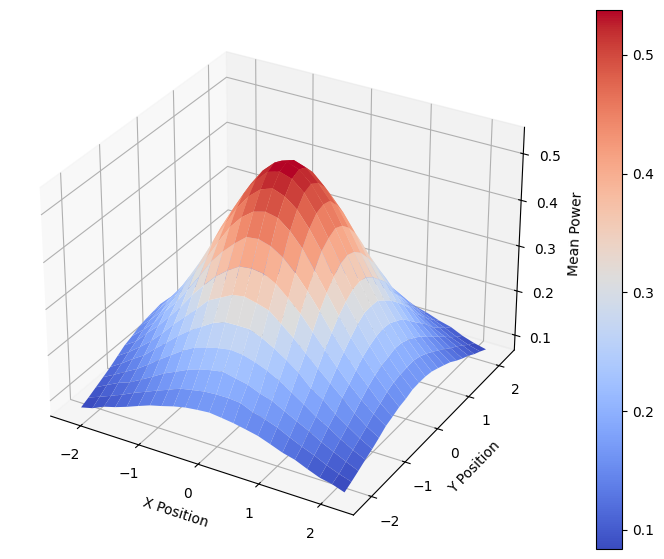

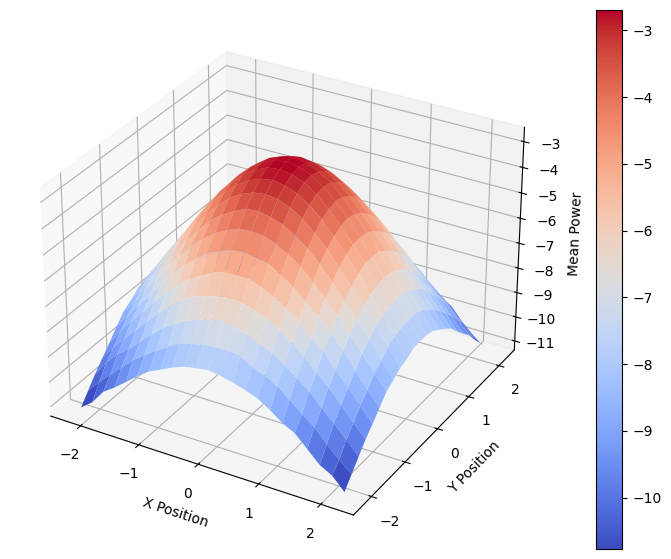

In [17]:
# Emitter
h = 2.15
theta = 70
power = 200

# Receiver
angle = 60
area = 0.016
index = 1.5

rho = 0.8

emitter = Emitter(np.array([0, 0, h]), np.array([0, 0, -1]), power, theta)
receiver = Receiver(0, angle, area, index, (-2.5, 2.5, -2.5, 2.5))
    
triangles = load_triangles_from_file("square_room", rho)
simulation = VLCSimulator([emitter], receiver, triangles)

X, Y, mean_power, nlos_mean_power = simulation.do_simulation(1000, 100, 100, 25)
#print(np.min(mean_power), np.max(mean_power))
X = X[1:-1, 1:-1]
Y = Y[1:-1, 1:-1]
mean_power = mean_power[1:-1, 1:-1]
nlos_mean_power = nlos_mean_power[1:-1, 1:-1]
plot_surface(X, Y, mean_power + nlos_mean_power)
plot_surface(X, Y, 10 * np.log10(mean_power + nlos_mean_power))

#### Four Lamps in a Square Room

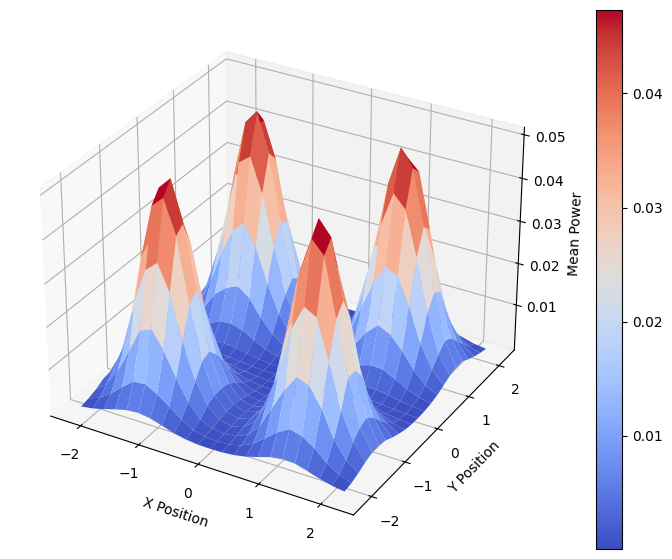

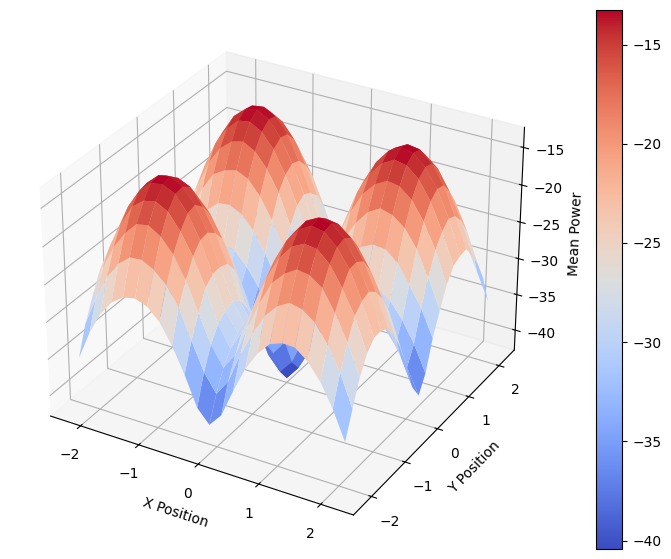

In [18]:
# Emitter
h = 2.15
theta = 12.5
power = 200

# Receiver
angle = 70
area = 1e-4
index = 1.5

emitter1 = Emitter(np.array([-1.25, -1.25, h]), np.array([0, 0, -1]), power, theta)
emitter2 = Emitter(np.array([-1.25, 1.25, h]), np.array([0, 0, -1]), power, theta)
emitter3 = Emitter(np.array([1.25, -1.25, h]), np.array([0, 0, -1]), power, theta)
emitter4 = Emitter(np.array([1.25, 1.25, h]), np.array([0, 0, -1]), power, theta)

receiver = Receiver(0.00001, angle, area, index, (-2.5, 2.5, -2.5, 2.5))
    
triangles = load_triangles_from_file("square_room", 0.8)

simulation = VLCSimulator([emitter1, emitter2, emitter3, emitter4], receiver, triangles)

X, Y, mean_power, nlos_mean_power = simulation.do_simulation(1000, 100, 100, 25)
X = X[1:-1, 1:-1]
Y = Y[1:-1, 1:-1]
mean_power = mean_power[1:-1, 1:-1]
nlos_mean_power = nlos_mean_power[1:-1, 1:-1]
plot_surface(X, Y, mean_power + nlos_mean_power)
plot_surface(X, Y, 10 * np.log10(mean_power + nlos_mean_power))

#### One Lamp in a Corner Room

0.0 3.6161889293702654


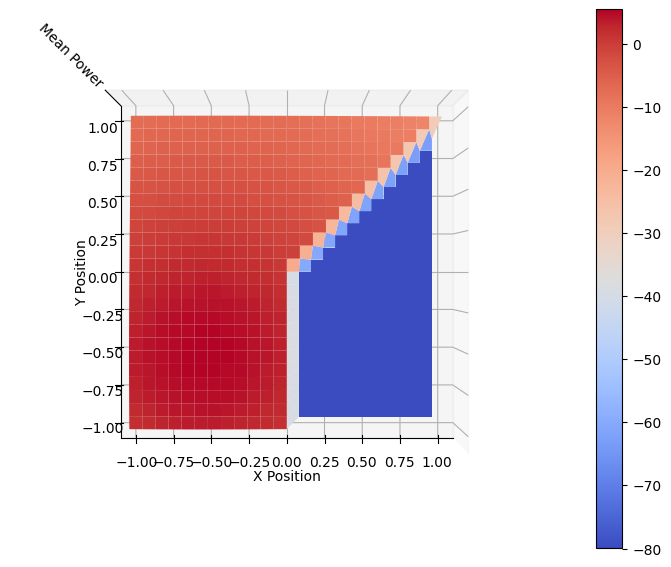

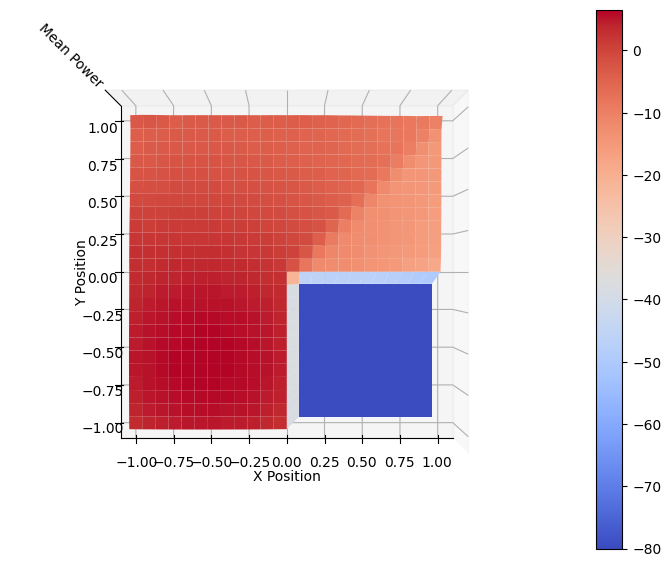

In [19]:
# Emitter
h = 0.9
theta = 50
power = 200

# Receiver
angle = 90
area = 0.016
index = 1.5

emitter_direction = np.array([0, 0, -1])
emitter_direction = normalize(emitter_direction)

emitter = Emitter(np.array([-0.5, -0.5, h]), emitter_direction, power, theta)
receiver = Receiver(0, angle, area, index, (-1, 1, -1, 1))
triangles = load_triangles_from_file("corner_room")

simulation = VLCSimulator([emitter], receiver, triangles)

X, Y, mean_power, nlos_mean_power = simulation.do_simulation(1000, 100, 100, 25)
print(np.min(mean_power), np.max(mean_power))
#plot_surface(X, Y, mean_power+nlos_mean_power, view=(90, -90, 0))
plot_surface(X, Y, 10 * np.log10(mean_power+0.00000001), view=(90, -90, 0))
plot_surface(X, Y, 10 * np.log10(mean_power+nlos_mean_power+0.00000001), view=(90, -90, 0))